In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from datetime import datetime
import geopandas as gpd

In [78]:
def analyze_data(): # Se define la función
    df = pd.read_excel('PQRD ABIERTAS SAVIA SALUD 25-06-2021 (1).xlsx')
    return df # La función retorna el DataFrame df con los datos procesados.

print(f"Total Filas: {analyze_data().shape[0]}\n")
print (analyze_data().head(5))

Total Filas: 891

        PQR_CODIGO       PQR_CANAL       PQR_NURC FECHA_CREACION PET_TIPOPER  \
0  PQRD-20-0094134  Redes Sociales            NaN     2020-02-04     Natural   
1  PQRD-20-0174377  Redes Sociales            NaN     2020-02-27     Natural   
2  PQRD-20-0322156             Web  1-2020-209540     2020-04-18     Natural   
3  PQRD-20-0549416      Telefonico            NaN     2020-07-01     Natural   
4  PQRD-20-0570639      Telefonico            NaN     2020-07-07     Natural   

   PET_NUMDOC                      PET_NOMBRES  PET_TELEFONO  \
0    21527295         MARILUZ  ARDILA DURANGO      5845209.0   
1    43870911                    SONIA CEPEDEZ           NaN   
2  1146442425       FRAMBER DAVID CORREA MUÑOZ     4993720.0   
3    43557678  DIANA  PATRICIA  HENAO  SALAZAR     2604966.0   
4    42963638      GLORIA EUGENIA MARIN GARCIA     2170904.0   

                    PET_MAIL  PET_COD_DEPTO  ... SNS_EXPR3 IDPATOLOGIA_2  \
0  MARYLUZARDILA71@gmail.com            

In [79]:
print("\nTipos de Datos:\n")
print(analyze_data().dtypes)


Tipos de Datos:

PQR_CODIGO                      object
PQR_CANAL                       object
PQR_NURC                        object
FECHA_CREACION          datetime64[ns]
PET_TIPOPER                     object
                             ...      
ESTADO AL 25/06/2021            object
REQUERIMIENTO                  float64
REQUERIMIENTO.1                 object
REQUERIMIENTO.2                 object
REQUERIMIENTO.3                  int64
Length: 81, dtype: object


In [80]:
print("\nNombres de las columnas:\n")
print(analyze_data().columns.tolist())


Nombres de las columnas:

['PQR_CODIGO', 'PQR_CANAL', 'PQR_NURC', 'FECHA_CREACION', 'PET_TIPOPER', 'PET_NUMDOC', 'PET_NOMBRES', 'PET_TELEFONO', 'PET_MAIL', 'PET_COD_DEPTO', 'PET_DPTO', 'PET_MPIO', 'PET_ENTIDAD', 'PQR_TIPOPETICION', 'AFEC_TIPOPER', 'AFEC_TIPODOC', 'AFEC_NUMDOC', 'AFEC_NOMBRES', 'AFEC_TELEFONO', 'AFEC_MAIL', 'AFEC_PARENTESCO', 'AFEC_GENERO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_REGAFILIACION', 'AFEC_GETNICO', 'AFEC_POBESPECIAL', 'AFEC_MPIO', 'AFEC_COD_DEPTO', 'AFEC_DPTO', 'AFEC_INSTITUCION', 'ENT_NOMBRE', 'ENT_TIPOVIG_SNS', 'ENT_COD_SNS', 'ENT_ALIAS_SNS', 'ENT_CODTIPOVIG', 'ENT_TIPOVIG', 'ENT_AMBITOIVC', 'ENT_COD_DEPTO', 'ENT_DPTO', 'ENT_MPIO', 'ENT_COD_MPIO', 'ENT_MPIO_DANE', 'PQR_CLASE_SNS', 'COD_MACROMOT', 'MACROMOTIVO', 'COD_MOTGEN', 'MOTIVO_GENERAL', 'COD_MOTESP', 'MOTIVO_ESPECIFICO', 'PATOLOGIA_1', 'PATOLOGIA_TIPO', 'CIE_10', 'ENTIDAD_FUNC', 'PQR_ESTADO', 'OBSERVACION', 'FUNCIONARIO_NOMBRE', 'ALERTA_TIPO', 'FECHA_RADICACION', 'POS', 'REMITIDO', 'RIESGO_VIDA', 'ALTO_CO

In [81]:
print("\nDimensiones de la Data:\n")
print(analyze_data().shape)


Dimensiones de la Data:

(891, 81)


In [82]:
# Ver columnas con valores nulos
print(analyze_data().isnull().sum())

PQR_CODIGO                0
PQR_CANAL                 0
PQR_NURC                742
FECHA_CREACION            0
PET_TIPOPER               0
                       ... 
ESTADO AL 25/06/2021      0
REQUERIMIENTO           857
REQUERIMIENTO.1         819
REQUERIMIENTO.2         694
REQUERIMIENTO.3           0
Length: 81, dtype: int64


In [83]:
def data_inconsistencias_Categoricas(df):

# 1. Identificar tipos de variables
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print("=== ANÁLISIS DE INCONSISTENCIAS ===\n")
    
# 2. Análisis de variables categóricas
    print("VARIABLES CATEGÓRICAS:")
    print("-----------------------")
    for col in categorical_cols:
        print(f"\nAnálisis de la columna: {col}")
        # Valores únicos y su frecuencia
        value_counts = df[col].value_counts()
        print(f"Valores únicos encontrados: {value_counts.to_dict()}")
        # Verificar valores raros o inconsistentes
        if df[col].str.contains(r'[^a-zA-Z]', na=False).any():
            print("⚠️ ALERTA: Contiene caracteres no alfabéticos")
        # Valores faltantes
        missing = df[col].isnull().sum()
        if missing > 0:
            print(f"⚠️ ALERTA: {missing} valores faltantes")

In [84]:
def data_inconsistencias_numericas(df):
    # 1. Identificar tipos de variables
    numeric_cols = df.select_dtypes(include=[np.number]).columns

# 3. Análisis de variables numéricas
    print("\nVARIABLES NUMÉRICAS:")
    print("-------------------")
    for col in numeric_cols:
        print(f"\nAnálisis de la columna: {col}")
        # Estadísticas básicas
        stats = df[col].describe()
        print(f"\nEstadísticas básicas:\n{stats}")
        
        # Detectar outliers usando el método IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"⚠️ ALERTA: {len(outliers)} outliers detectados")
            print(f"\nValores fuera de rango: {df[col][outliers.index].tolist()}")
        
        # Verificar valores negativos donde no deberían existir
        if df[col].min() < 0:
            print("⚠️ ALERTA: Contiene valores negativos")
        
        # Verificar valores faltantes
        missing = df[col].isnull().sum()
        if missing > 0:
            print(f"⚠️ ALERTA: {missing} valores faltantes")

In [85]:
def data_inconsistencias_resumen(df):
    # Resumen final de inconsistencias
    print("\nRESUMEN DE INCONSISTENCIAS:")
    print("-------------------------")
    total_missing = df.isnull().sum().sum()
    total_rows = len(df)
    print(f"Total de valores faltantes: {total_missing} ({(total_missing/(total_rows*len(df.columns))*100):.2f}% del total)")
    print(f"Filas con al menos un valor faltante: {df.isnull().any(axis=1).sum()} ({(df.isnull().any(axis=1).sum()/total_rows*100):.2f}% de las filas)")

In [86]:
def limpiar_datos_texto(df):

# Limpieza básica de nombres de columnas
    columnas_texto = df.select_dtypes(include=['object']).columns
    for col in columnas_texto:
        # Eliminar múltiples espacios
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
        # Eliminar caracteres especiales
        df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)
    return df

In [87]:
def limpiar_datos_duplicado(df):
    #Eliminar filas duplicadas
    df = df.drop_duplicates()
    return df

In [88]:
def limpiar_datos_espacios(df):
    # Limpieza de espacios en blanco en columnas de texto
    columnas_texto = df.select_dtypes(include=['object']).columns
    for col in columnas_texto:
        df[col] = df[col].str.strip()
    return df

In [89]:
def limpiar_datos_fecha(df):
# Convertir fechas a formato datetime
    columnas_fecha = ['fecha_radicacion', 'fecha_vencimiento']  
    for col in columnas_fecha:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

In [90]:
def limpiar_datos_nulos(df):
# Manejar valores nulos
    
# Reemplazar valores nulos en columnas numéricas con 0
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    df[columnas_numericas] = df[columnas_numericas].fillna(0)
    
    # Reemplazar valores nulos en columnas de texto con 'Sin especificar'
    columnas_texto = df.select_dtypes(include=['object']).columns
    df[columnas_texto] = df[columnas_texto].fillna('Sin especificar')
        
    # Eliminar filas con todos los valores nulos
    df = df.dropna(how='all')

# Normalizar texto (convertir a mayúsculas o minúsculas según necesidad)
    for col in columnas_texto:
        df[col] = df[col].str.upper()
        
    return df

In [91]:
def datos_normalizado(df):

# Guardar archivo limpio
    nombre_archivo_limpio = 'PQRD_SAVIA_SALUD_LIMPIO.xlsx'
    df.to_excel(nombre_archivo_limpio, index=False)
    return df, nombre_archivo_limpio

In [92]:
def estadisticas(df):
    """
    Muestra las estadísticas descriptivas del dataset.
    """
    print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
    print(df.describe().round(2))

    return None

In [93]:
# llamado funciones
df = analyze_data()
data_inconsistencias_Categoricas(df)
data_inconsistencias_numericas(df)
data_inconsistencias_resumen(df)
limpiar_datos_texto(df)
limpiar_datos_duplicado(df)
limpiar_datos_espacios(df)
limpiar_datos_fecha(df)
limpiar_datos_nulos(df)
print("Terminando")
data_inconsistencias_resumen(df)


=== ANÁLISIS DE INCONSISTENCIAS ===

VARIABLES CATEGÓRICAS:
-----------------------

Análisis de la columna: PQR_CODIGO
Valores únicos encontrados: {'PQRD-21-0470155': 1, 'PQRD-20-0094134': 1, 'PQRD-20-0174377': 1, 'PQRD-20-0322156': 1, 'PQRD-20-0549416': 1, 'PQRD-20-0570639': 1, 'PQRD-20-0614503': 1, 'PQRD-20-0616485': 1, 'PQRD-20-0624648': 1, 'PQRD-20-0640574': 1, 'PQRD-20-0650398': 1, 'PQRD-21-0465767': 1, 'PQRD-21-0464658': 1, 'PQRD-21-0464802': 1, 'PQRD-21-0462390': 1, 'PQRD-21-0463644': 1, 'PQRD-21-0462770': 1, 'PQRD-21-0463617': 1, 'PQRD-21-0463108': 1, 'PQRD-21-0462966': 1, 'PQRD-21-0464129': 1, 'PQRD-21-0462466': 1, 'PQRD-21-0462070': 1, 'PQRD-21-0461246': 1, 'PQRD-21-0459417': 1, 'PQRD-21-0460299': 1, 'PQRD-21-0459915': 1, 'PQRD-20-1031537': 1, 'PQRD-20-1012715': 1, 'PQRD-20-0996011': 1, 'PQRD-20-0995316': 1, 'PQRD-20-0993488': 1, 'PQRD-20-0979211': 1, 'PQRD-20-0963661': 1, 'PQRD-20-0961868': 1, 'PQRD-20-0961153': 1, 'PQRD-20-0957644': 1, 'PQRD-20-0955958': 1, 'PQRD-20-095609

Distribución de PQRD por canal de atención

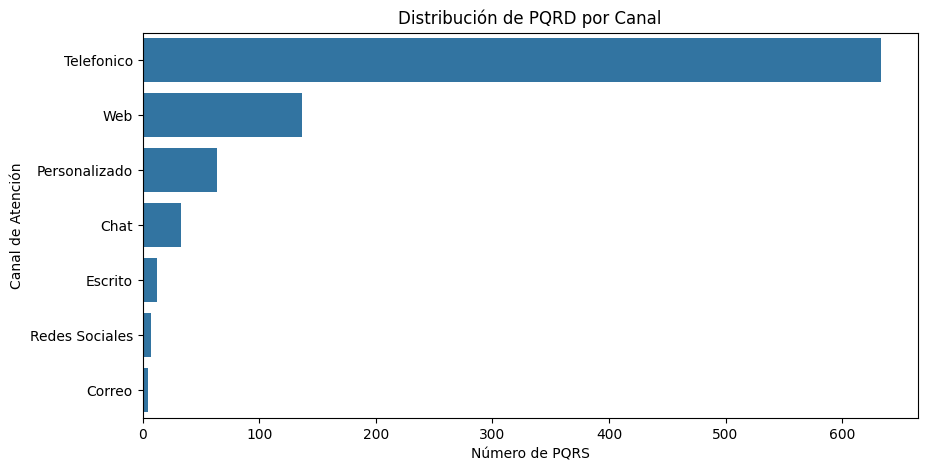

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="PQR_CANAL", order=df["PQR_CANAL"].value_counts().index)
plt.xlabel("Número de PQRS")
plt.ylabel("Canal de Atención")
plt.title("Distribución de PQRD por Canal")
plt.show()

Estado de PQRS 

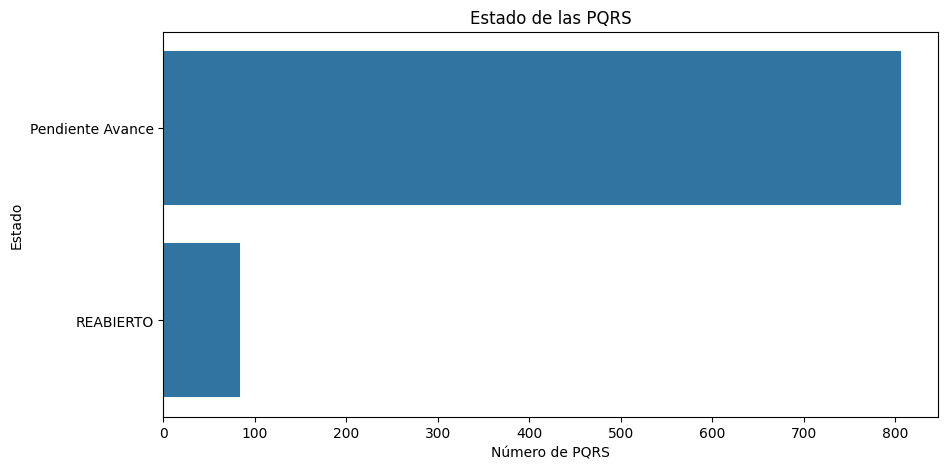

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="ESTADO AL 25/06/2021", order=df["ESTADO AL 25/06/2021"].value_counts().index)
plt.xlabel("Número de PQRS")
plt.ylabel("Estado")
plt.title("Estado de las PQRS")
plt.show()

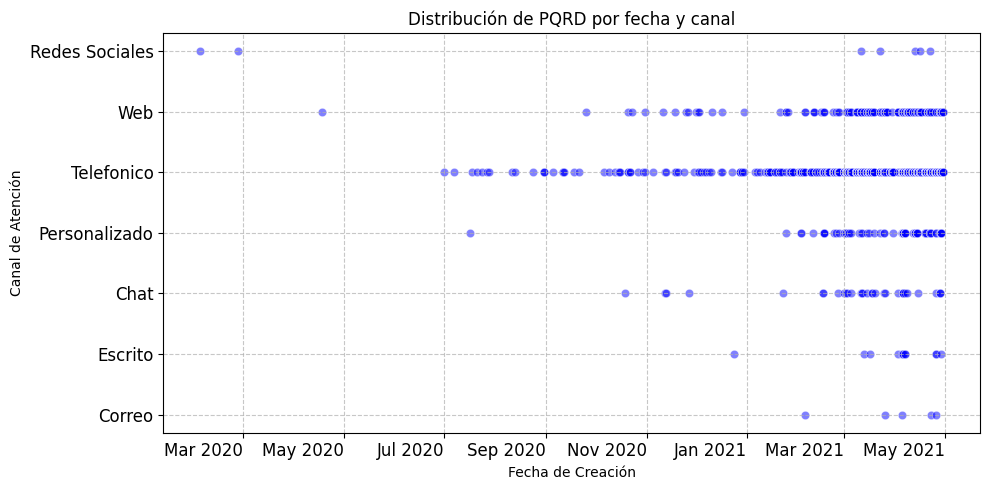

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=df, x="FECHA_CREACION", y="PQR_CANAL", ax=ax, color='blue', alpha=0.5)
plt.xlabel("Fecha de Creación")
plt.ylabel("Canal de Atención")
plt.title("Distribución de PQRD por fecha y canal")

plt.xticks(rotation=0, ha='right', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato: mes abreviado y año
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribucción de Edad

In [97]:
# Definir el orden correcto de los rangos de edad
orden_edades = [
    'De 0 A 5 Años',
    'De 6 A 12 Años',
    'De 13 A 17 Años',
    'De 18 A 24 Años',
    'De 25 A 37 Años',
    'De 38 A 49 Años',
    'De 50 A 62 Años',
    'Mayor de 63 Años'
]

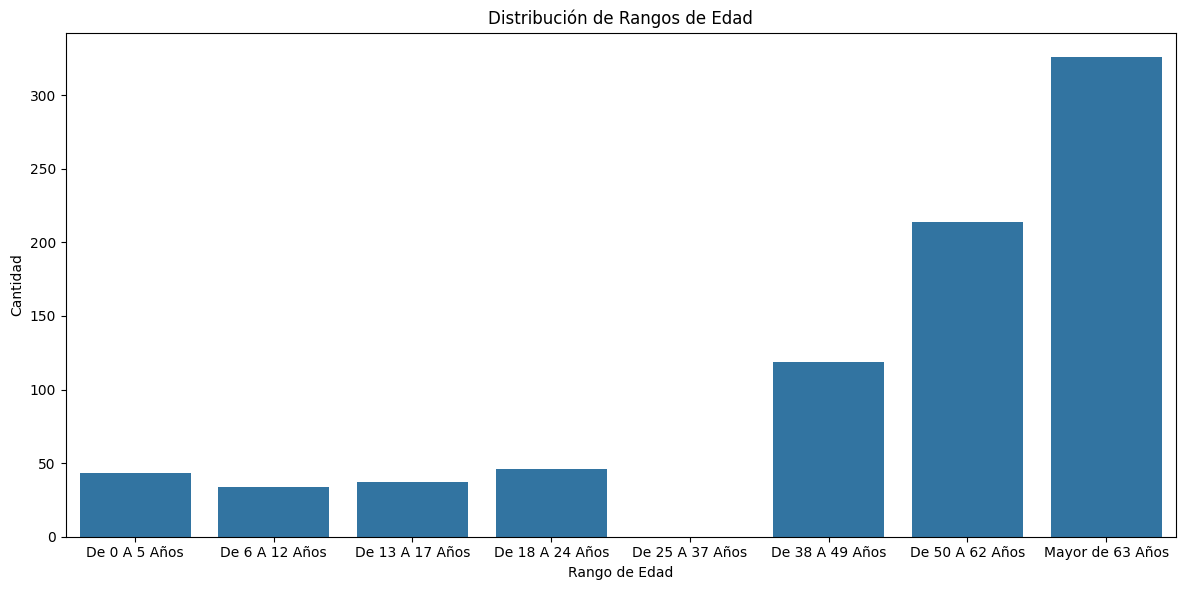

In [98]:
plt.figure(figsize=(12, 6))
conteo_edades = df['AFEC_EDADR'].value_counts().reindex(orden_edades)

sns.barplot(x=conteo_edades.index, y=conteo_edades.values)
plt.title('Distribución de Rangos de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


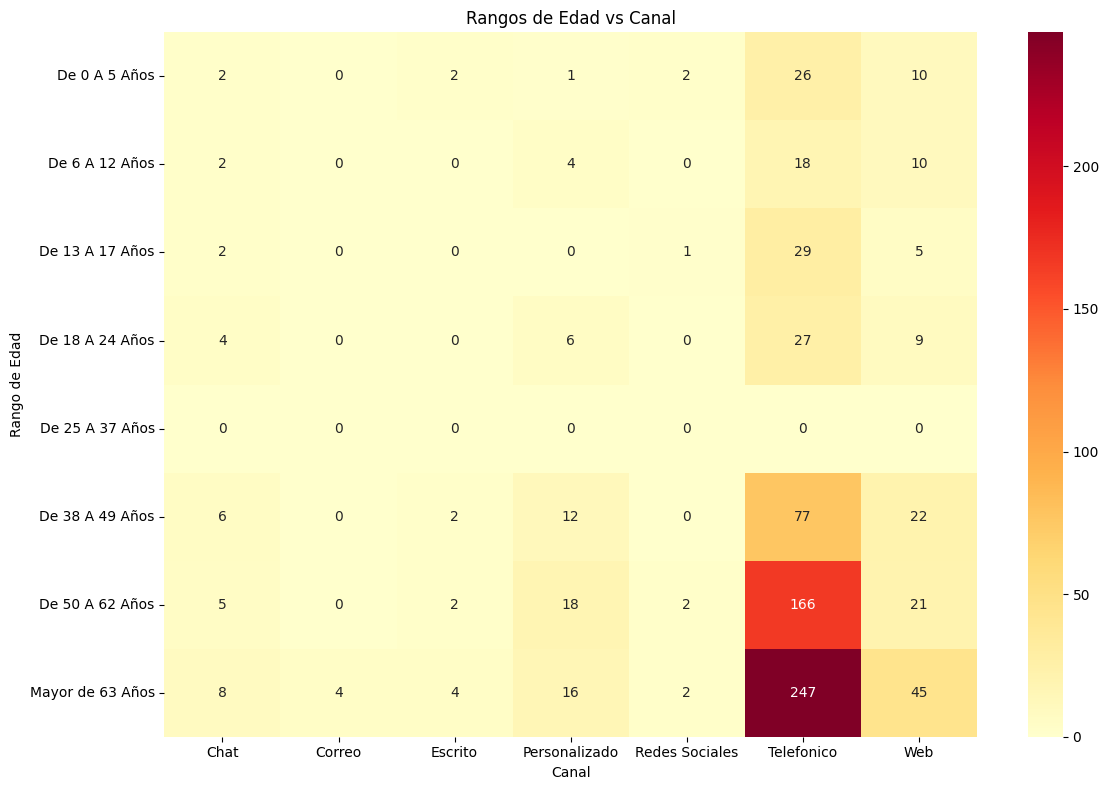

In [99]:

plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(df['AFEC_EDADR'], df['PQR_CANAL']) # Se crea tabla cruzada
heatmap_data = heatmap_data.reindex(orden_edades) # Reordenar según orden_edades
heatmap_data = heatmap_data.fillna(0).astype(int) # Rellenar NaN con 0 y convertir a enteros
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Rangos de Edad vs Canal')
plt.xlabel('Canal')
plt.ylabel('Rango de Edad')
plt.tight_layout()
plt.show()



In [100]:

df['codigo_dane'] = df['ENT_COD_MPIO']
df = df.set_index("codigo_dane")
display(df)


,PQR_CODIGO,PQR_CANAL,PQR_NURC,FECHA_CREACION,PET_TIPOPER,PET_NUMDOC,PET_NOMBRES,PET_TELEFONO,PET_MAIL,PET_COD_DEPTO,...,SNS_EXPR3,IDPATOLOGIA_2,IDRANGOEDADES,AÑO,ESTADO AL 11/05/2021,ESTADO AL 25/06/2021,REQUERIMIENTO,REQUERIMIENTO.1,REQUERIMIENTO.2,REQUERIMIENTO.3
codigo_dane,,,,,,,,,,,,,,,,,,,,,
5490,PQRD200094134,Redes Sociales,Sin especificar,2020-02-04,Natural,21527295,MARILUZ ARDILA DURANGO,5845209.0,MARYLUZARDILA71gmailcom,5.0,...,0.0,769,1,2020,REABIERTO,REABIERTO,2.031501e+12,Sin especificar,202131500335401,202131500714521
5001,PQRD200174377,Redes Sociales,Sin especificar,2020-02-27,Natural,43870911,SONIA CEPEDEZ,0.0,fofy2980hotmailcom,5.0,...,0.0,769,1,2020,REABIERTO,REABIERTO,0.000000e+00,Sin especificar,202131500335401,202131500714521
5001,PQRD200322156,Web,12020209540,2020-04-18,Natural,1146442425,FRAMBER DAVID CORREA MUÑOZ,4993720.0,denysofiacorreagmailcom,5.0,...,0.0,752,3,2020,REABIERTO,REABIERTO,0.000000e+00,Sin especificar,Sin especificar,202131500714521
5001,PQRD200549416,Telefonico,Sin especificar,2020-07-01,Natural,43557678,DIANA PATRICIA HENAO SALAZAR,2604966.0,henapedianagmailcom,5.0,...,0.0,752,6,2020,Pendiente Avance,Pendiente Avance,2.031501e+12,202131500027871,202131500335401,202131500714521
5001,PQRD200570639,Telefonico,Sin especificar,2020-07-07,Natural,42963638,GLORIA EUGENIA MARIN GARCIA,2170904.0,glomaga08hotmailcom,5.0,...,0.0,769,9,2020,REABIERTO,REABIERTO,2.031501e+12,202131500027871,202131500335401,202131500714521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,PQRD210470185,Web,12021124309,2021-04-30,Natural,1015074441,TOMAS ANDRES SILVA AGUDELO,0.0,sandimil1hotmailcom,5.0,...,0.0,763,8,2021,Pendiente Avance,Pendiente Avance,0.000000e+00,Sin especificar,Sin especificar,202131500714521
5001,PQRD210469303,Web,260420210332,2021-04-30,Natural,1131227392,DULCE MARIA CORDOBA MENA,0.0,yurleycordoba2016gmailcom,5.0,...,0.0,767,8,2021,Pendiente Avance,Pendiente Avance,0.000000e+00,Sin especificar,Sin especificar,202131500714521
5001,PQRD210469024,Telefonico,Sin especificar,2021-04-30,Natural,3506279,LUIS EDUARDO RENDON GIRALDO,0.0,luisrendon472gmailcom,5.0,...,0.0,13,9,2021,Pendiente Avance,Pendiente Avance,0.000000e+00,Sin especificar,Sin especificar,202131500714521


In [101]:
# Agrupar por 'ENT_COD_MPIO' y contar
casos_reportados_agrupados = df.groupby("ENT_COD_MPIO")["ENT_COD_MPIO"].agg(['count']).reset_index()
casos_reportados_agrupados.rename(columns={"ENT_COD_MPIO": "codigo_dane", "count": "total_reportados"}, inplace=True)

print(casos_reportados_agrupados.head())

   codigo_dane  total_reportados
0         5001               530
1         5002                 3
2         5031                 2
3         5034                 2
4         5042                 3


In [102]:
municipios = gpd.read_file("GeoPandas/COL_Municipio.zip")
#municipios = municipios.set_index("cod_dane")
municipios

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
2,05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
3,05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((-8352494.01 715689.897, -8352304.867..."
4,05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((-8425665.892 679202.38, -8425597.038..."
...,...,...,...,...,...,...
1117,97889,1108,4.669929e+09,4.292950e+05,97889000,"POLYGON ((-7759205.373 123549.666, -7759311.32..."
1118,99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((-7546884.015 705017.769, -7546632.27..."
1119,99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((-7684507.959 690786.085, -7684118.07..."
1120,99624,4235,3.992354e+09,3.642825e+05,99624000,"POLYGON ((-7866588.235 600460.855, -7866405.66..."


In [103]:
#print(municipios['ID'].dtype)
display(casos_reportados_agrupados)

,codigo_dane,total_reportados
0,5001,530
1,5002,3
2,5031,2
3,5034,2
4,5042,3
...,...,...
84,5887,5
85,5890,4
86,11001,2
87,19001,1


In [104]:
municipios['cod_dane'] = municipios['ID'].astype(int)
casos_reportados_agrupados['codigo_dane'] = casos_reportados_agrupados['codigo_dane'].astype(int)

In [105]:
preparation_data = municipios.merge(casos_reportados_agrupados, left_on='cod_dane', right_on='codigo_dane')

In [106]:
preparation_data = preparation_data.sort_values(by = 'total_reportados', ascending = False)
preparation_data.head(15)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,codigo_dane,total_reportados
0,05001,2559097,3.798647e+08,107257.930213,5001,"POLYGON ((-8423087.868 710530.773, -8423036.11...",5001,530
11,05088,557749,1.453409e+08,64621.581687,5088,"POLYGON ((-8414216.495 717391.965, -8414173.23...",5088,65
38,05360,292933,2.014907e+07,22986.755383,5360,"POLYGON ((-8415822.603 691539.356, -8415748.11...",5360,24
20,05154,96394,1.457569e+09,316324.824876,5154,"POLYGON ((-8339885.275 903865.692, -8339868.66...",5154,18
26,05212,82649,7.156294e+07,51234.486484,5212,"POLYGON ((-8403322.205 714331.912, -8403337.52...",5212,16
9,05079,54898,2.097249e+08,81485.206070,5079,"POLYGON ((-8384334.497 725596.988, -8384301.37...",5079,11
73,05697,36976,7.892609e+07,58544.379441,5697,"POLYGON ((-8376867.452 688453.371, -8376808.00...",5697,11
29,05266,244651,8.200271e+07,52116.687208,5266,"POLYGON ((-8403032.794 690367.368, -8402981.00...",5266,10
6,05045,129039,5.706729e+08,139903.074947,5045,"POLYGON ((-8506397.247 889557.137, -8506354.71...",5045,10
59,05631,88873,1.595750e+07,18284.887253,5631,"POLYGON ((-8416306.199 687391.53, -8416163.463...",5631,7


<Axes: >

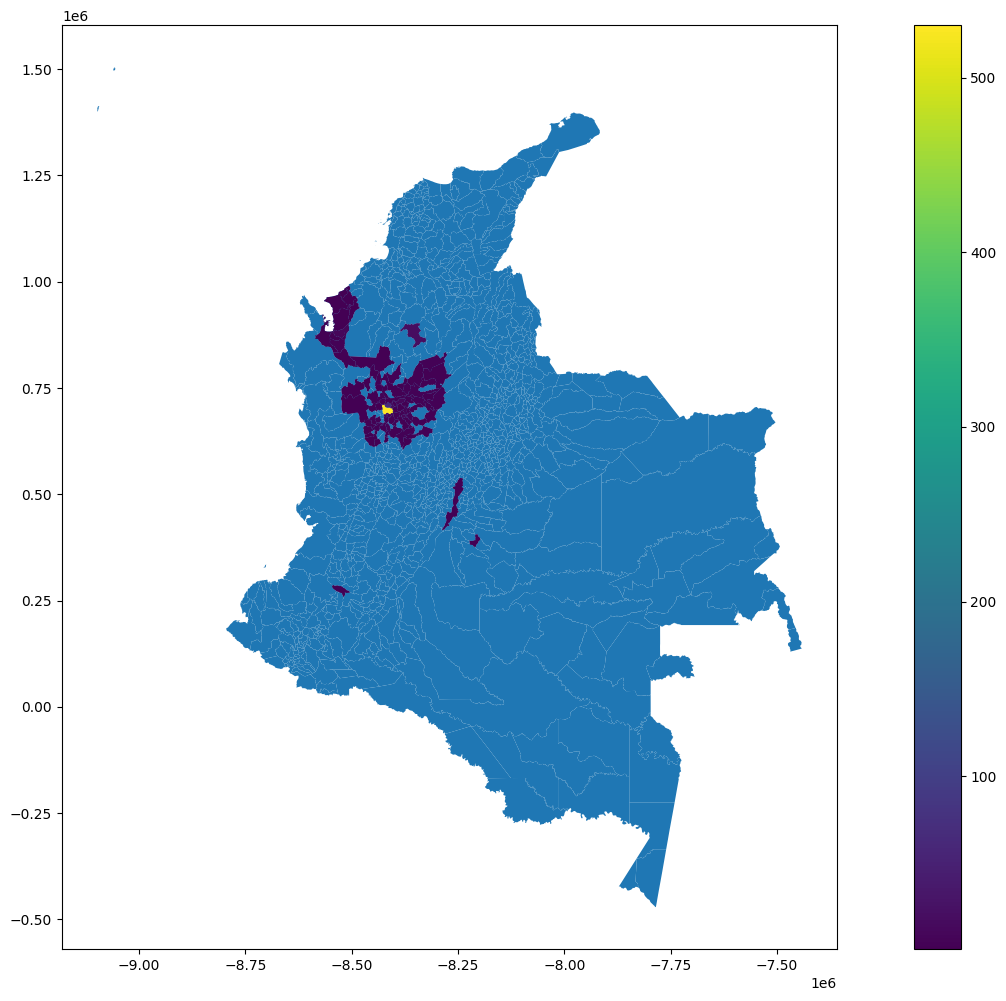

In [107]:
axis = municipios.plot(figsize = (20, 12))
preparation_data.plot(column = "total_reportados", ax = axis, legend = True)

#Social Impact Assessment

In [108]:
dfpatologias = pd.read_excel('patologias.xlsx')
dfCategories = pd.read_excel('Categories.xlsx', sheet_name='Canal')
dfPeticion = pd.read_excel('Categories.xlsx', sheet_name='Peticion')
dfAltoCosto = pd.read_excel('Categories.xlsx', sheet_name='AltoCosto')
dfMotivo = pd.read_excel('Categories.xlsx', sheet_name='Motivo')

In [109]:
categorized_cases_data = df.merge(dfpatologias, left_on='PATOLOGIA_TIPO', right_on='PATOLOGIA_TIPO')
categorized_cases_data = categorized_cases_data.merge(dfCategories, left_on='PQR_CANAL', right_on='PQR_CANAL') 
categorized_cases_data = categorized_cases_data.merge(dfPeticion, left_on='PQR_TIPOPETICION', right_on='PQR_TIPOPETICION') 
categorized_cases_data = categorized_cases_data.merge(dfAltoCosto, left_on='ALTO_COSTO', right_on='ALTO_COSTO') 
categorized_cases_data = categorized_cases_data.merge(dfMotivo, left_on='MACROMOTIVO', right_on='MACROMOTIVO') 

In [110]:
#categorized_cases_data
display(analyze_data()['RIESGO_VIDA'])

0      SI
1      SI
2      SI
3      NO
4      SI
       ..
886    NO
887    SI
888    SI
889    SI
890    SI
Name: RIESGO_VIDA, Length: 891, dtype: object

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_25804\854467098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=riesgo_counts.index, y=riesgo_counts.values, palette=['blue', 'red'])


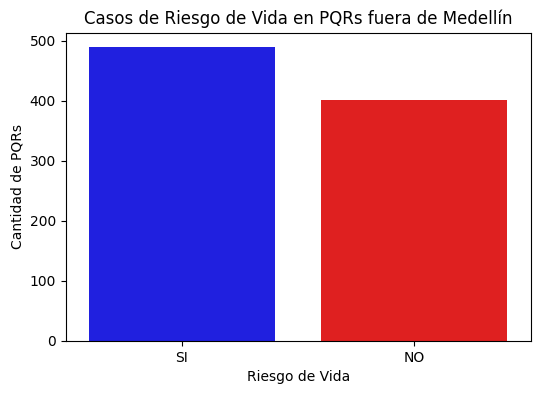

In [111]:
# count Risk aond not risk cases
riesgo_counts = categorized_cases_data['RIESGO_VIDA'].value_counts()

# Graph
plt.figure(figsize=(6,4))
sns.barplot(x=riesgo_counts.index, y=riesgo_counts.values, palette=['blue', 'red'])
plt.xlabel("Riesgo de Vida")
plt.ylabel("Cantidad de PQRs")
plt.title("Casos de Riesgo de Vida en PQRs fuera de Medellín")

plt.show()

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_25804\3863236773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vulnerable_counts.index, y=vulnerable_counts.values, palette="coolwarm")


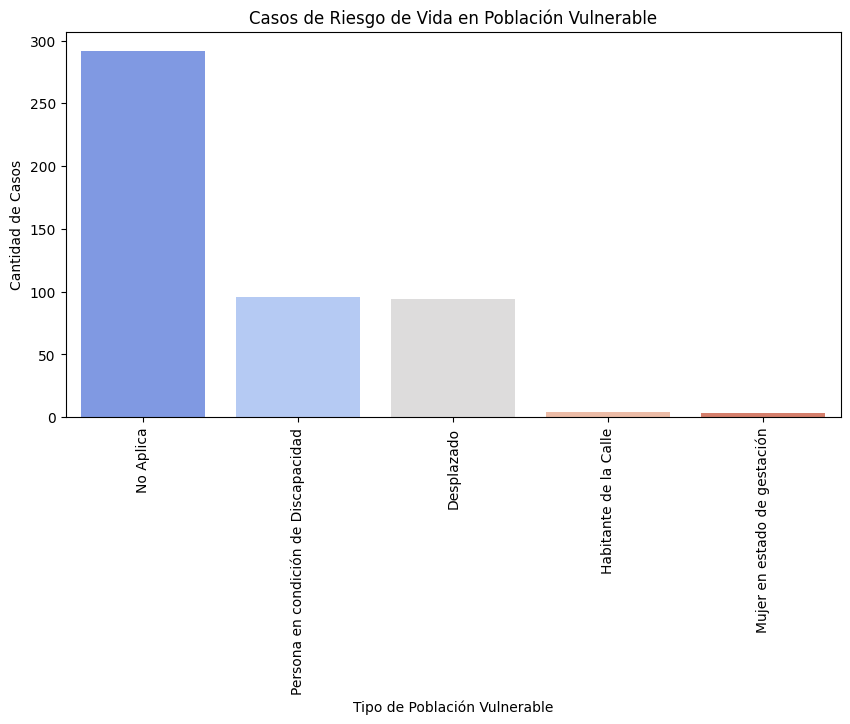

In [112]:
# life-threatening cases affect vulnerable populations.
df_riesgo = categorized_cases_data[categorized_cases_data['RIESGO_VIDA'] == 'SI']

#  vulnerable populations impact
vulnerable_counts = df_riesgo['AFEC_POBESPECIAL'].value_counts()

#Graph
plt.figure(figsize=(10,5))
sns.barplot(x=vulnerable_counts.index, y=vulnerable_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Población Vulnerable")
plt.ylabel("Cantidad de Casos")
plt.title("Casos de Riesgo de Vida en Población Vulnerable")
plt.show()

In [113]:
display(categorized_cases_data.dtypes)

PQR_CODIGO                object
PQR_CANAL                 object
PQR_NURC                  object
FECHA_CREACION    datetime64[ns]
PET_TIPOPER               object
                       ...      
Categoría                 object
IDPQRCANAL                object
IDTIPOPETICION            object
ALTOCOSTO                  int64
MOTIVO                    object
Length: 86, dtype: object

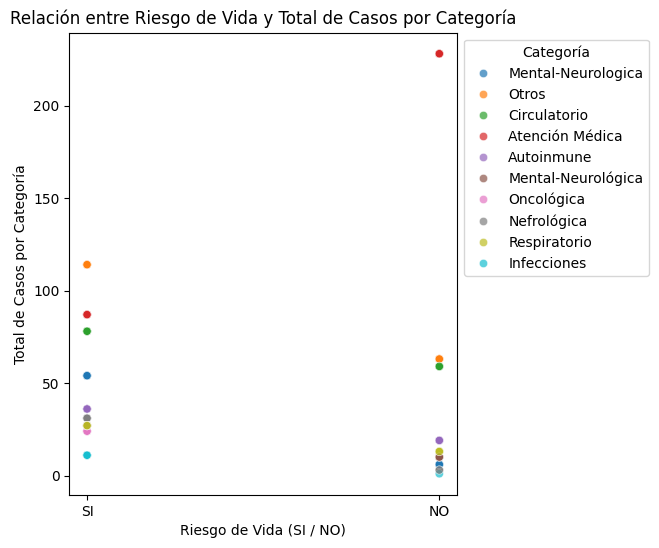

In [114]:
# life-threatening cases and category
categoria_counts = categorized_cases_data.groupby(['Categoría', 'RIESGO_VIDA']).size().reset_index(name='Total_Casos')
categorized_cases_data = categorized_cases_data.merge(categoria_counts, on=['Categoría', 'RIESGO_VIDA'], how='left')

# Graph
plt.figure(figsize=(5, 6))
sns.scatterplot(data=categorized_cases_data, x="RIESGO_VIDA", y="Total_Casos", hue="Categoría", alpha=0.7, palette="tab10")

plt.xlabel("Riesgo de Vida (SI / NO)")
plt.ylabel("Total de Casos por Categoría")
plt.title("Relación entre Riesgo de Vida y Total de Casos por Categoría")
plt.legend(title="Categoría", bbox_to_anchor=(1, 1))
plt.show()

In [115]:

columnas_deseadas = [
    'IDPQRCANAL', 'IDTIPOPETICION','AFEC_POBESPECIAL','MOTIVO','ALTOCOSTO'
]

# Filtrar el DataFrame con las columnas deseadas
df_numeric = categorized_cases_data[columnas_deseadas]

In [116]:
display(df_numeric)
df_numeric["AFEC_POBESPECIAL"] = df_numeric["AFEC_POBESPECIAL"].replace({
    "Persona en condición de Discapacidad": "Condición especial",
    "No Aplica": "Sin discapacidad",
    "Mujer en estado de gestación": "Mujer gestante",
})

,IDPQRCANAL,IDTIPOPETICION,AFEC_POBESPECIAL,MOTIVO,ALTOCOSTO
0,RS,R,Persona en condición de Discapacidad,RASS,0
1,RS,R,No Aplica,RASS,0
2,Web,R,Desplazado,RASS,0
3,Tel,R,No Aplica,DEA,0
4,Tel,R,No Aplica,RASS,0
...,...,...,...,...,...
886,Web,R,No Aplica,RASS,0
887,Web,R,No Aplica,RASS,0
888,Tel,R,Desplazado,DEA,1
889,Tel,R,No Aplica,RASS,0


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_25804\2859681819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["AFEC_POBESPECIAL"] = df_numeric["AFEC_POBESPECIAL"].replace({


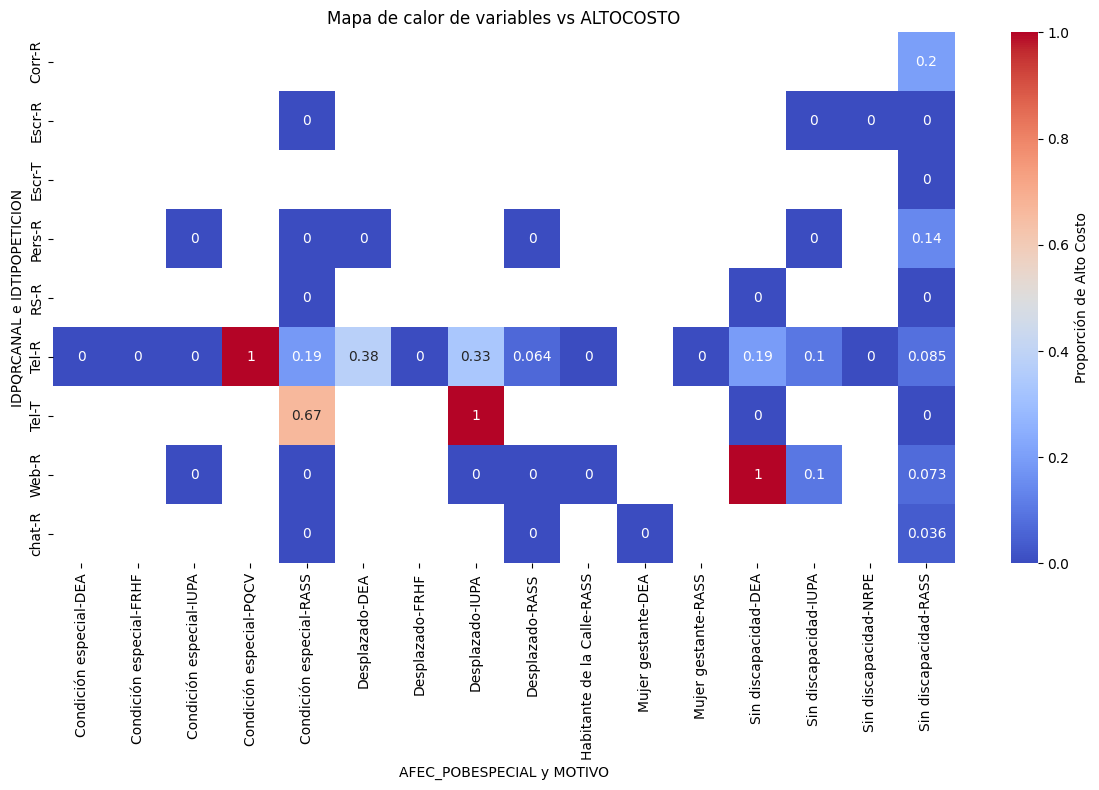

In [117]:
# Crear una tabla pivot para calcular proporciones de ALTOCOSTO
heatmap_data = df_numeric.groupby(["IDPQRCANAL", "IDTIPOPETICION", "AFEC_POBESPECIAL", "MOTIVO"])["ALTOCOSTO"].mean().reset_index()

# Pivotear para el mapa de calor
pivot_table = heatmap_data.pivot_table(
    index=["IDPQRCANAL", "IDTIPOPETICION"], 
    columns=["AFEC_POBESPECIAL", "MOTIVO"], 
    values="ALTOCOSTO"
)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': 'Proporción de Alto Costo'})
plt.title("Mapa de calor de variables vs ALTOCOSTO")
plt.xlabel("AFEC_POBESPECIAL y MOTIVO")
plt.ylabel("IDPQRCANAL e IDTIPOPETICION")
plt.tight_layout()
plt.show()

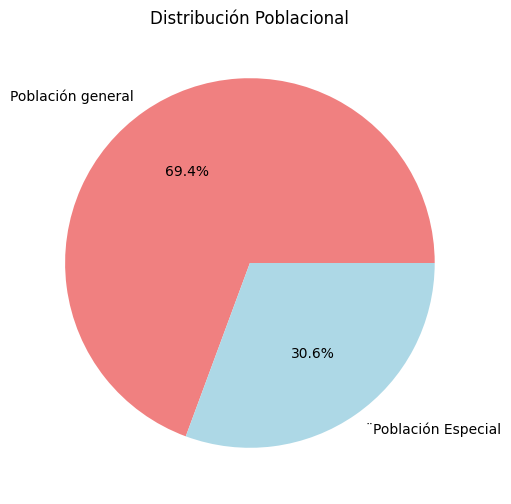

In [118]:
#  Identify how PQRs affect vulnerable populations, such as ethnic groups, people with limited access to education or with special needs.

# firs step, identify vulnerable populations proportion
counts = df['AFEC_POBESPECIAL'].value_counts()
no_aplica_count = counts.get('No Aplica', 0)
otros_count = counts.sum() - no_aplica_count

# Graph
plt.figure(figsize=(6, 6))
plt.pie([no_aplica_count, otros_count], labels=['Población general', '¨Población Especial'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribución Poblacional')
plt.show()

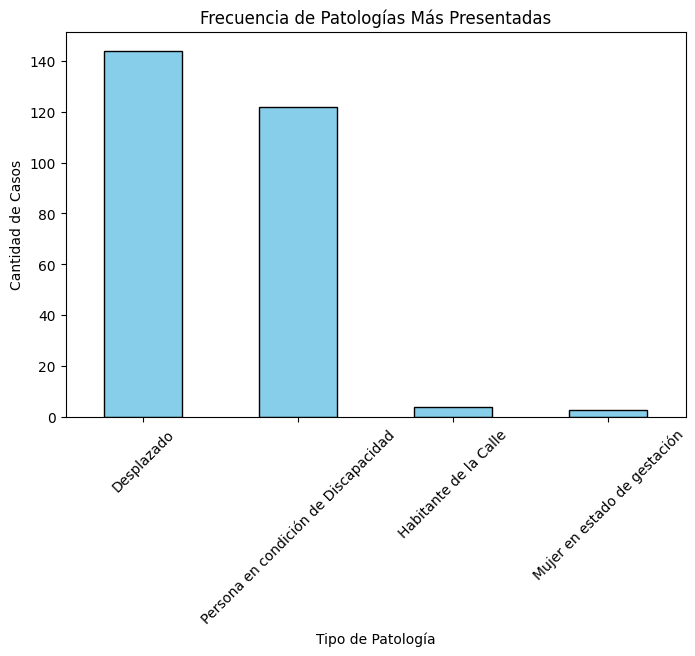

In [119]:
# working with vulnerable poblation
dfpoblacionespacial = df[df['AFEC_POBESPECIAL']!='No Aplica']

poblacion_espacial_counts = dfpoblacionespacial['AFEC_POBESPECIAL'].value_counts()

# graph
plt.figure(figsize=(8, 5))
poblacion_espacial_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Patologías Más Presentadas')
plt.xlabel('Tipo de Patología')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)
plt.show()

In [120]:
dfpoblacionespacial['codigo_dane'] = dfpoblacionespacial['ENT_COD_MPIO']
dfpoblacionespacial = dfpoblacionespacial.set_index("codigo_dane")
display(df)


# Agrupar por 'ENT_COD_MPIO' y contar
casos_reportados_agrupados = dfpoblacionespacial.groupby("ENT_COD_MPIO")["ENT_COD_MPIO"].agg(['count']).reset_index()
casos_reportados_agrupados.rename(columns={"ENT_COD_MPIO": "codigo_dane", "count": "total_reportados"}, inplace=True)

print(casos_reportados_agrupados.head())

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_25804\3547818638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpoblacionespacial['codigo_dane'] = dfpoblacionespacial['ENT_COD_MPIO']


,PQR_CODIGO,PQR_CANAL,PQR_NURC,FECHA_CREACION,PET_TIPOPER,PET_NUMDOC,PET_NOMBRES,PET_TELEFONO,PET_MAIL,PET_COD_DEPTO,...,SNS_EXPR3,IDPATOLOGIA_2,IDRANGOEDADES,AÑO,ESTADO AL 11/05/2021,ESTADO AL 25/06/2021,REQUERIMIENTO,REQUERIMIENTO.1,REQUERIMIENTO.2,REQUERIMIENTO.3
codigo_dane,,,,,,,,,,,,,,,,,,,,,
5490,PQRD200094134,Redes Sociales,Sin especificar,2020-02-04,Natural,21527295,MARILUZ ARDILA DURANGO,5845209.0,MARYLUZARDILA71gmailcom,5.0,...,0.0,769,1,2020,REABIERTO,REABIERTO,2.031501e+12,Sin especificar,202131500335401,202131500714521
5001,PQRD200174377,Redes Sociales,Sin especificar,2020-02-27,Natural,43870911,SONIA CEPEDEZ,0.0,fofy2980hotmailcom,5.0,...,0.0,769,1,2020,REABIERTO,REABIERTO,0.000000e+00,Sin especificar,202131500335401,202131500714521
5001,PQRD200322156,Web,12020209540,2020-04-18,Natural,1146442425,FRAMBER DAVID CORREA MUÑOZ,4993720.0,denysofiacorreagmailcom,5.0,...,0.0,752,3,2020,REABIERTO,REABIERTO,0.000000e+00,Sin especificar,Sin especificar,202131500714521
5001,PQRD200549416,Telefonico,Sin especificar,2020-07-01,Natural,43557678,DIANA PATRICIA HENAO SALAZAR,2604966.0,henapedianagmailcom,5.0,...,0.0,752,6,2020,Pendiente Avance,Pendiente Avance,2.031501e+12,202131500027871,202131500335401,202131500714521
5001,PQRD200570639,Telefonico,Sin especificar,2020-07-07,Natural,42963638,GLORIA EUGENIA MARIN GARCIA,2170904.0,glomaga08hotmailcom,5.0,...,0.0,769,9,2020,REABIERTO,REABIERTO,2.031501e+12,202131500027871,202131500335401,202131500714521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,PQRD210470185,Web,12021124309,2021-04-30,Natural,1015074441,TOMAS ANDRES SILVA AGUDELO,0.0,sandimil1hotmailcom,5.0,...,0.0,763,8,2021,Pendiente Avance,Pendiente Avance,0.000000e+00,Sin especificar,Sin especificar,202131500714521
5001,PQRD210469303,Web,260420210332,2021-04-30,Natural,1131227392,DULCE MARIA CORDOBA MENA,0.0,yurleycordoba2016gmailcom,5.0,...,0.0,767,8,2021,Pendiente Avance,Pendiente Avance,0.000000e+00,Sin especificar,Sin especificar,202131500714521
5001,PQRD210469024,Telefonico,Sin especificar,2021-04-30,Natural,3506279,LUIS EDUARDO RENDON GIRALDO,0.0,luisrendon472gmailcom,5.0,...,0.0,13,9,2021,Pendiente Avance,Pendiente Avance,0.000000e+00,Sin especificar,Sin especificar,202131500714521


   codigo_dane  total_reportados
0         5001               178
1         5031                 1
2         5034                 1
3         5042                 1
4         5045                 2


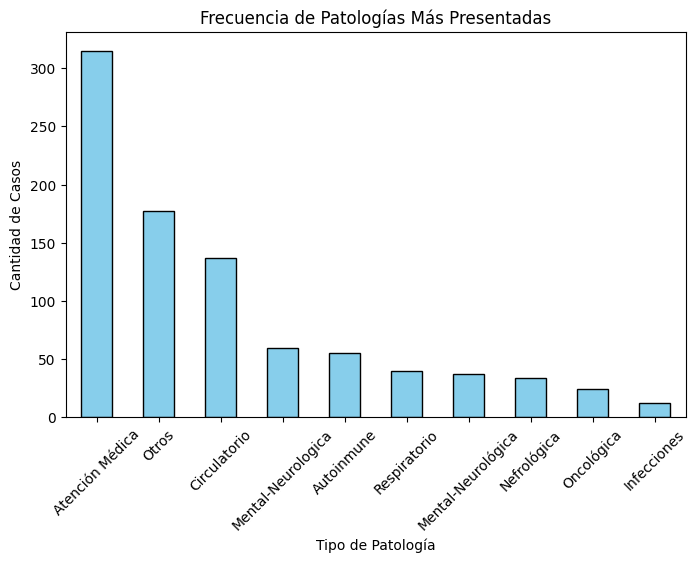

Conteo de motivos por patología:
PATOLOGIA_TIPO                  MOTIVO_GENERAL                                                    
ACV ACCIDENTE CEREBRO VASCULAR  RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUTORIZACION               5
                                RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNIDAD PARA LA ATENCION    4
                                LIMITACIONES EN LA INFORMACION                                        1
ARTRITIS REUMATOIDEA            RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNIDAD PARA LA ATENCION    5
                                RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUTORIZACION               4
                                                                                                     ..
SOSPECHA COVID 19               RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNIDAD PARA LA ATENCION    1
SÍNDROME DE LIDDLE              RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNIDAD PARA LA ATENCION    1
TAKAYASU ENFERMEDAD DE          INEF

In [121]:
# working with vulnerable poblation
filtered_df = categorized_cases_data[categorized_cases_data['Categoría'] != 'No Aplica']

# Contar las patologías más presentadas
patologia_counts = filtered_df['Categoría'].value_counts()
#UPDATE
# Crear gráfica de barras para las patologías más presentadas
plt.figure(figsize=(8, 5))
patologia_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Patologías Más Presentadas')
plt.xlabel('Tipo de Patología')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)
plt.show()

# Paso 3: Contar los motivos por patología
motivos_por_patologia = filtered_df.groupby('PATOLOGIA_TIPO')['MOTIVO_GENERAL'].value_counts()

# Mostrar el conteo de motivos por patología
print("Conteo de motivos por patología:")
print(motivos_por_patologia)


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_25804\3561942545.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


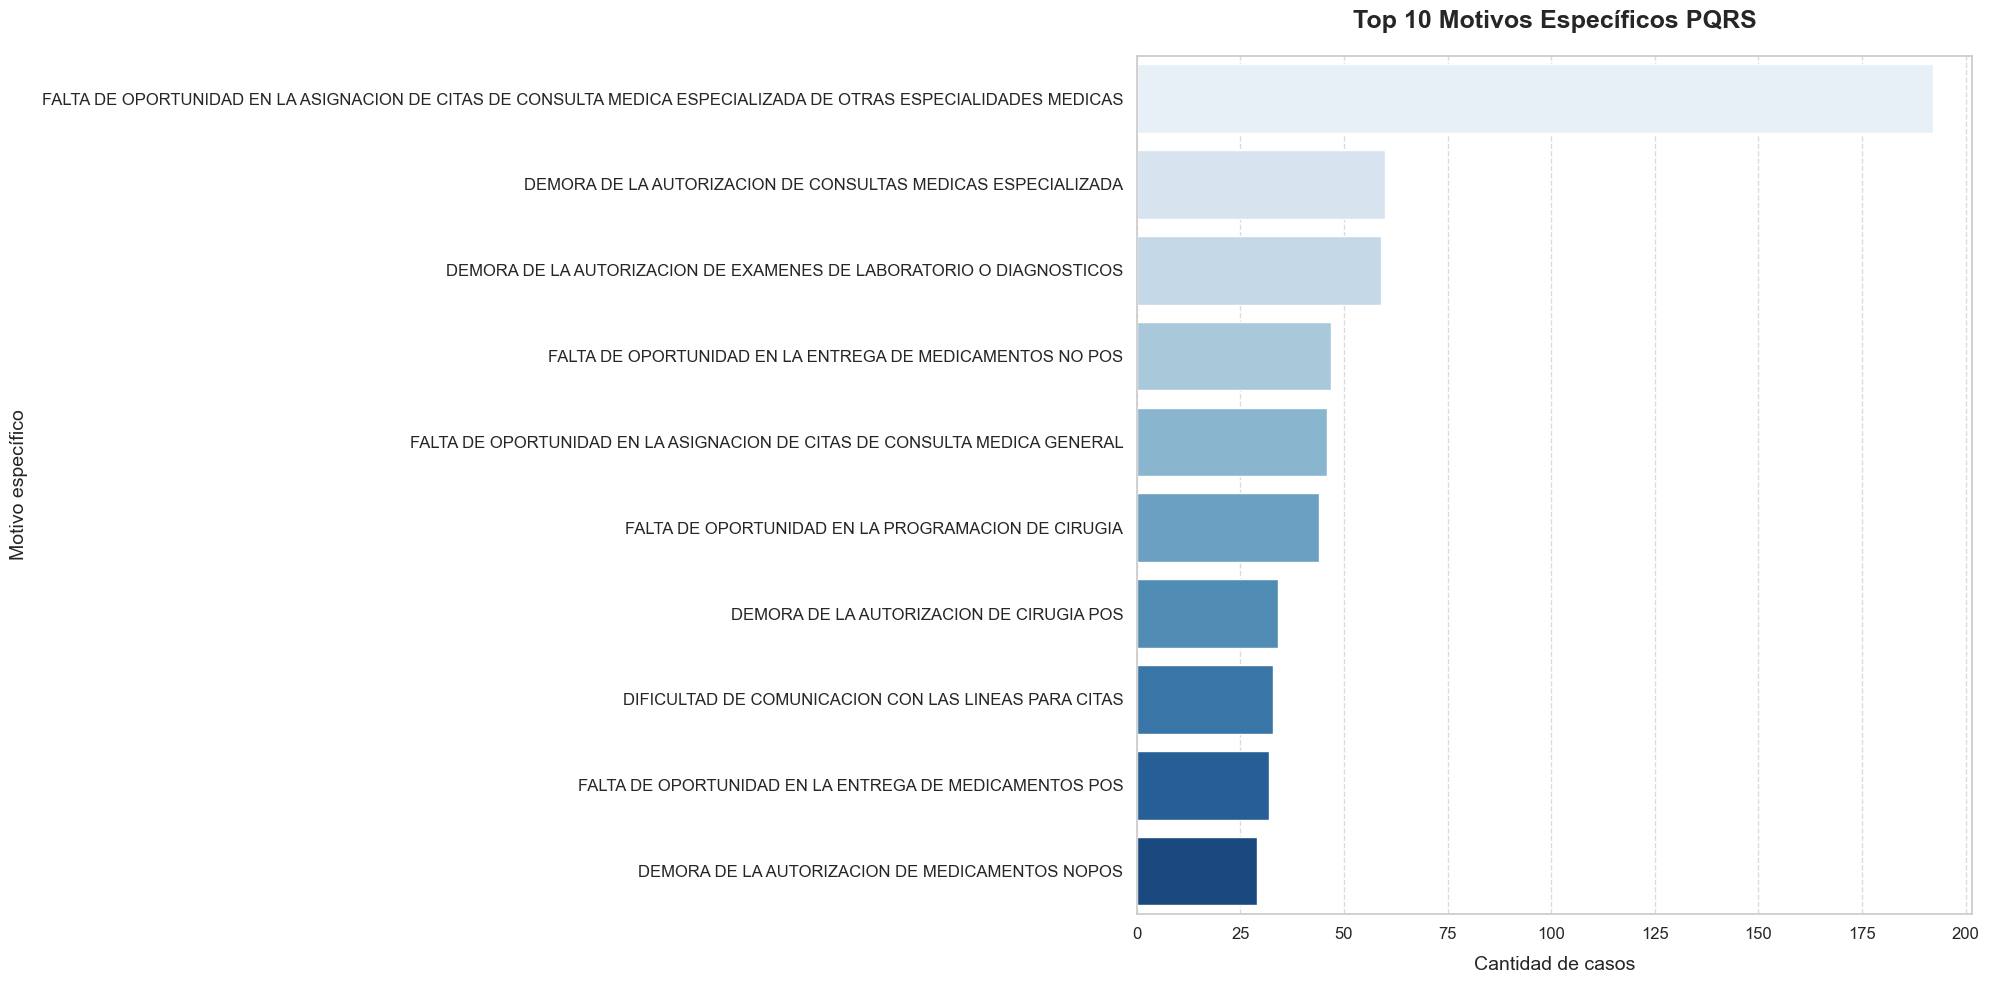

In [122]:
# Configuración de estilo
sns.set_theme(style="whitegrid")
sns.set_palette("Blues_r")

df['MOTIVO_ESPECIFICO'] = df['MOTIVO_ESPECIFICO'].fillna('Desconocido')

# Top 10 motivos específicos
top_categories = df['MOTIVO_ESPECIFICO'].value_counts().head(10)

# Configuración del gráfico
plt.figure(figsize=(20, 10))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    palette="Blues", # Paleta de Color
    orient="h", # Estilo horizontal
)
plt.title('Top 10 Motivos Específicos PQRS', fontsize=18, weight='bold', pad=20)
plt.xlabel('Cantidad de casos', fontsize=14, labelpad=10)
plt.ylabel('Motivo específico', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_25804\1879230078.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='FECHA_CREACION').size() # Obtener los conteos mensuales


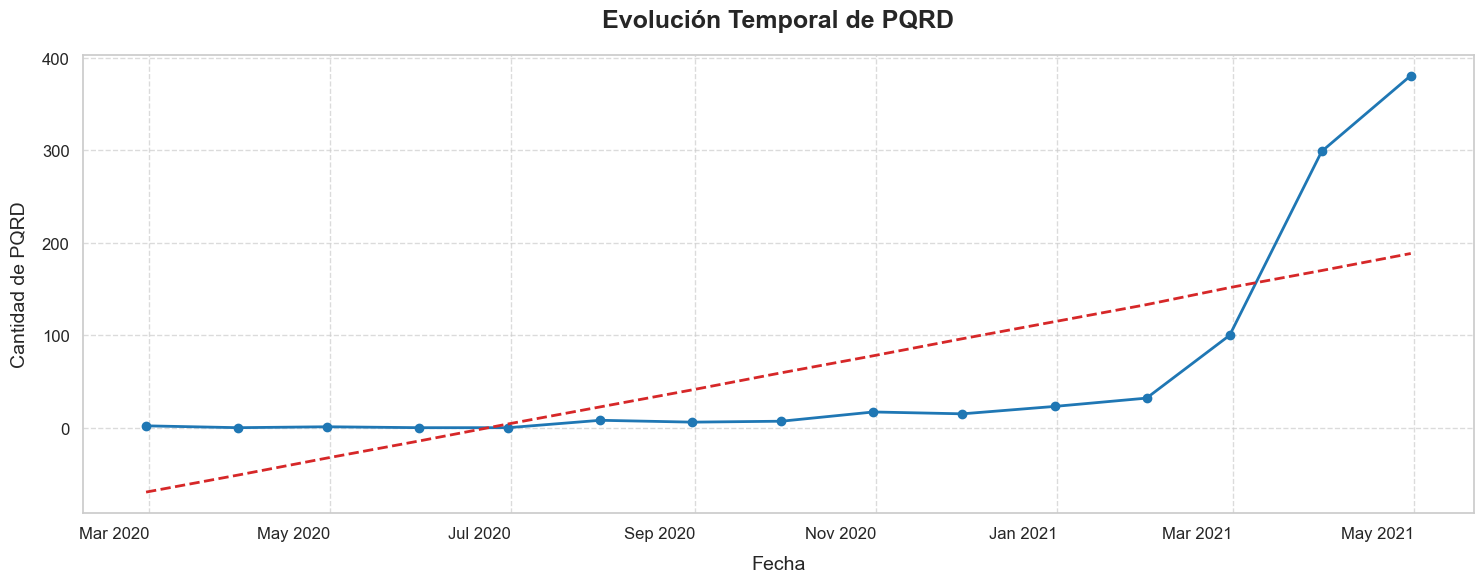

In [123]:
df['FECHA_CREACION'] = pd.to_datetime(df['FECHA_CREACION'])
monthly_counts = df.resample('M', on='FECHA_CREACION').size() # Obtener los conteos mensuales

# Ajuste de tendencia (lineal)
z = np.polyfit(np.arange(len(monthly_counts)), monthly_counts.values, 1)
p = np.poly1d(z)

# Graficar la serie temporal con la línea de tendencia
plt.figure(figsize=(15, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='tab:blue', linestyle='-', linewidth=2, markersize=6)
plt.plot(monthly_counts.index, p(np.arange(len(monthly_counts))), color='tab:red', linestyle='--', linewidth=2)  # Línea de tendencia

# Títulos y etiquetas
plt.title('Evolución Temporal de PQRD', fontsize=18, weight='bold', pad=20)
plt.xlabel('Fecha', fontsize=14, labelpad=10)
plt.ylabel('Cantidad de PQRD', fontsize=14, labelpad=10)

# Formatear las fechas en el eje X para mostrar mes y año
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato: mes abreviado y año
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


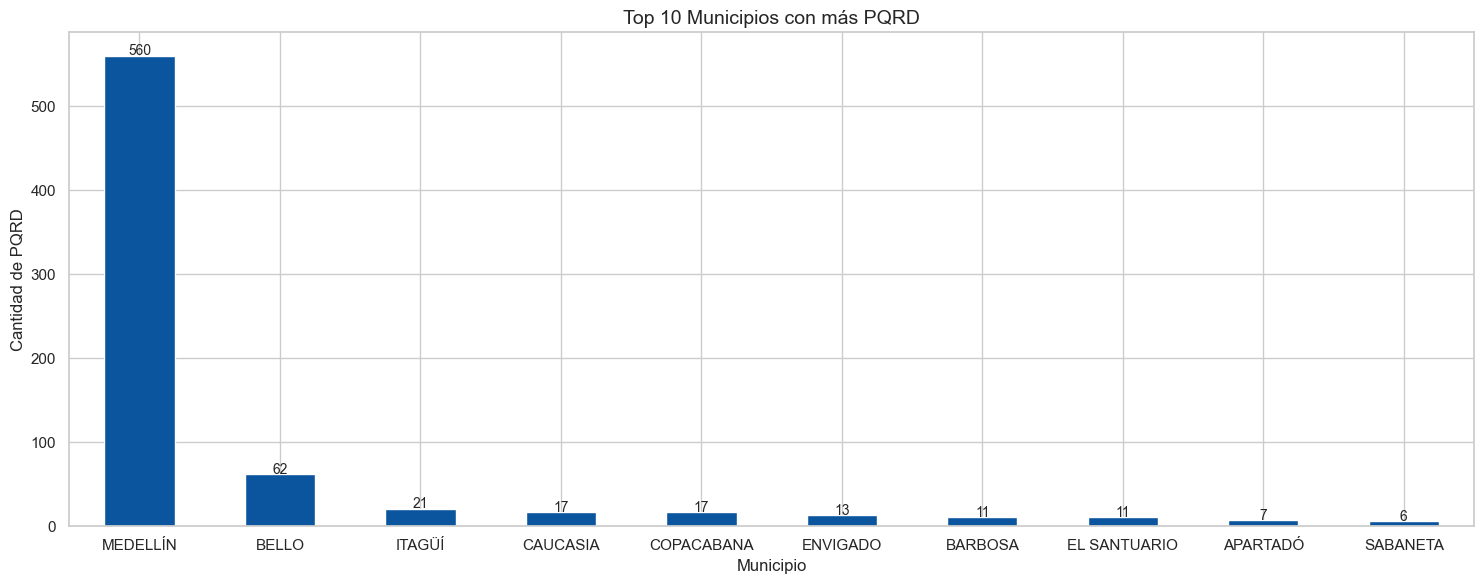

In [124]:
#Top 10 de municipios con mas PQRS
plt.figure(figsize=(15, 6))
ax = df['AFEC_MPIO'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Municipios con más PQRD', fontsize=14)
plt.xlabel('Municipio', fontsize=12)
plt.ylabel('Cantidad de PQRD', fontsize=12)
plt.xticks(rotation=0)

# Añadir los valores en la parte superior de las barras
for i, v in enumerate(df['AFEC_MPIO'].value_counts().head(10).values):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Tiempo de Respuesta Por Prioridad - Se mide la eficiencia de Respuesta  a cada PQR

In [125]:
# Convertir fechas
df['FECHA_CREACION'] = pd.to_datetime(df['FECHA_CREACION'])
df['FECHA_RADICACION'] = pd.to_datetime(df['FECHA_RADICACION'])

# Calcular tiempo de respuesta en días
df['tiempo_respuesta'] = (df['FECHA_RADICACION'] - df['FECHA_CREACION']).dt.total_seconds() / (24*60*60)

# Definir prioridad basada en RIESGO_VIDA y ALTO_COSTO
def get_priority(row):
    if row['RIESGO_VIDA'] == 'SI' and row['ALTO_COSTO'] == 'SI':
        return 'Alta'
    elif row['RIESGO_VIDA'] == 'SI' or row['ALTO_COSTO'] == 'SI':
        return 'Media'
    return 'Baja'
df['prioridad'] = df.apply(get_priority, axis=1)

NameError: name 'bars' is not defined

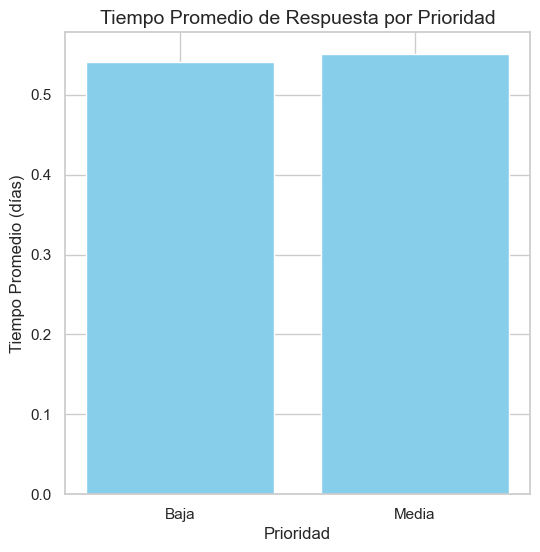

In [126]:

# Tiempo promedio de respuesta por prioridad
tiempo_promedio = df.groupby('prioridad')['tiempo_respuesta'].mean()

# Crear la figura
plt.figure(figsize=(6, 6))

# Graficar el gráfico de barras
plt.bar(tiempo_promedio.index, tiempo_promedio.values, color='skyblue')

# Títulos y etiquetas
plt.title('Tiempo Promedio de Respuesta por Prioridad', fontsize=14)
plt.xlabel('Prioridad', fontsize=12)
plt.ylabel('Tiempo Promedio (días)', fontsize=12)

# Añadir los valores dentro de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2.,
             f'{height:.1f}',
             ha='center', va='center')
    
# Mostrar el gráfico
plt.tight_layout()
plt.show()


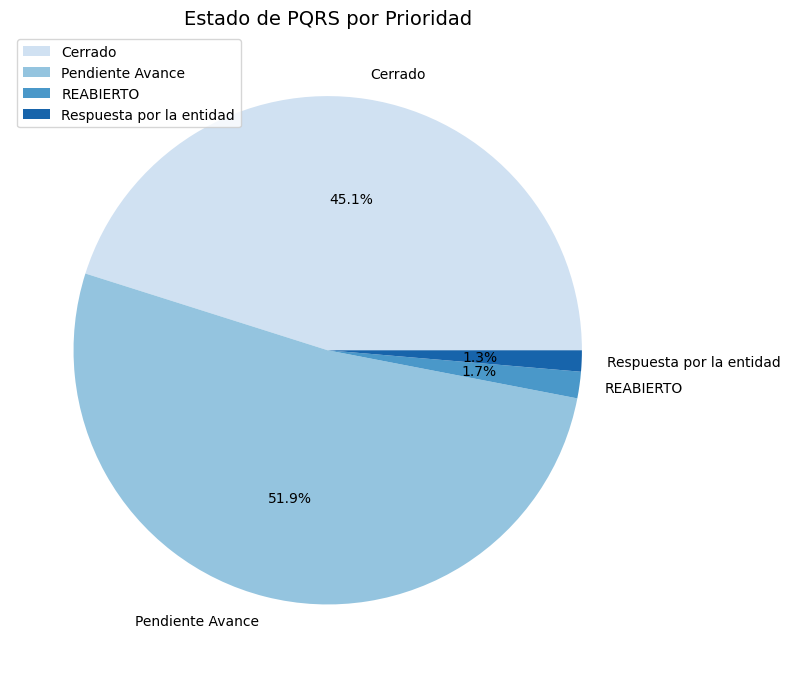

In [46]:
# Calcular la distribución de estado de PQRS por prioridad
estado_prioridad = pd.crosstab(df['prioridad'], df['PQR_ESTADO'])
plt.figure(figsize=(8, 8))
estado_prioridad.sum(axis=0).plot(kind='pie', autopct='%1.1f%%', legend=True, colors=sns.color_palette("Blues", len(estado_prioridad.columns)))
plt.title('Estado de PQRS por Prioridad', fontsize=14)
plt.tight_layout()
plt.show()


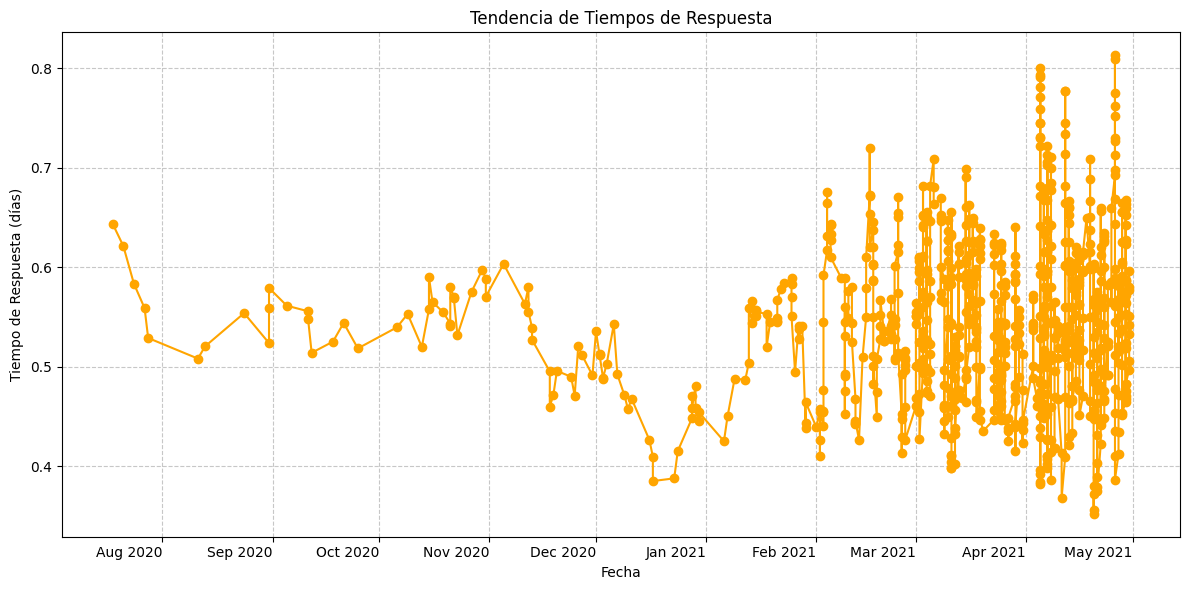

In [61]:
# Tendencia de tiempos de respuesta
# Ordenar los datos por fecha de creación
df_sorted = df.sort_values('FECHA_CREACION')
plt.figure(figsize=(12, 6))

# Graficar la tendencia de tiempos de respuesta con una media móvil de 7 días
plt.plot(df_sorted['FECHA_CREACION'], df_sorted['tiempo_respuesta'].rolling(window=7).mean(), marker='o', color='orange')
plt.title('Tendencia de Tiempos de Respuesta', fontsize=12)
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Tiempo de Respuesta (días)', fontsize=10)

# Formatear las fechas en el eje X para mostrar mes y año
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato: mes abreviado y año
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

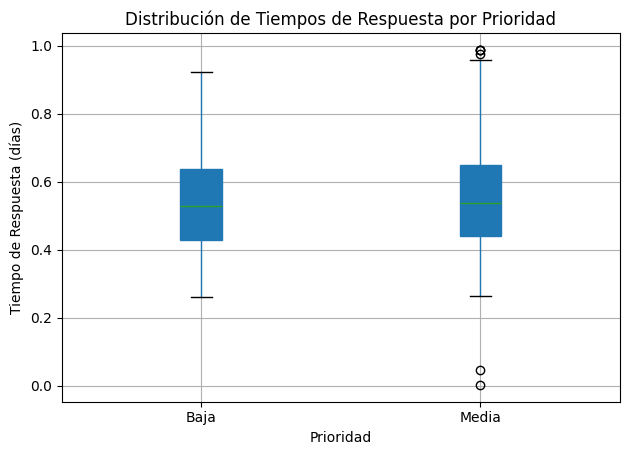

In [63]:
# Distribución de tiempos de respuesta por prioridad
plt.figure(figsize=(12, 6))
# Graficar el boxplot
df.boxplot(column='tiempo_respuesta', by='prioridad', patch_artist=True)
plt.title('Distribución de Tiempos de Respuesta por Prioridad', fontsize=12)
plt.suptitle('')  # Eliminar el título adicional que genera "by prioriodad"
plt.xlabel('Prioridad', fontsize=10)
plt.ylabel('Tiempo de Respuesta (días)', fontsize=10)
plt.tight_layout()
plt.show()

In [66]:
# Mostrar métricas clave
print("\nMétricas de Eficiencia:")
print(f"Tiempo promedio de respuesta global: {df['tiempo_respuesta'].mean():.1f} días")
print("\nPQRS por prioridad:")
print(df['prioridad'].value_counts())
print("\nPQRS pendientes por prioridad:")
pendientes = df[df['PQR_ESTADO'] == 'Pendiente Avance'].groupby('prioridad').size()
print(pendientes)


Métricas de Eficiencia:
Tiempo promedio de respuesta global: 0.5 días

PQRS por prioridad:
prioridad
Media    489
Baja     402
Name: count, dtype: int64

PQRS pendientes por prioridad:
prioridad
Media    462
dtype: int64


In [65]:
# Leer archivos
df_pqrd = pd.read_excel('PQRD_SAVIA_SALUD_LIMPIO.xlsx')
df_patologias = pd.read_excel('patologias.xlsx')

# Filtrar población especial
df_especial = df_pqrd[df_pqrd['AFEC_POBESPECIAL'] != 'No Aplica']

# Unir con categorías de patologías
df_merged = df_especial.merge(df_patologias, on='PATOLOGIA_TIPO', how='left')

# Crear tabla pivote
pivot = pd.crosstab(df_merged['AFEC_POBESPECIAL'], df_merged['Categoría'])

# Crear gráfico
fig = px.bar(pivot, 
             title='Categorías de Patologías por Población Especial',
             labels={'value': 'Cantidad de casos',
                    'AFEC_POBESPECIAL': 'Población Especial',
                    'Categoría': 'Categoría de Patología'},
             height=600)

# Personalizar
fig.update_layout(
    showlegend=True,
    xaxis_tickangle=0,
    barmode='group'
)

fig.show()

# Mostrar top 3 categorías por población
print("\nTop 3 categorías de patologías por población especial:")
for poblacion in pivot.index:
    print(f"\n{poblacion}:")
    top_cats = pivot.loc[poblacion].sort_values(ascending=False).head(3)
    for cat, count in top_cats.items():
        print(f"- {cat}: {count} casos")


Top 3 categorías de patologías por población especial:

Desplazado:
- Atención Médica: 55 casos
- Circulatorio: 26 casos
- Otros: 25 casos

Habitante de la Calle:
- Mental-Neurologica: 2 casos
- Atención Médica: 1 casos
- Mental-Neurológica: 1 casos

Mujer en estado de gestación:
- Atención Médica: 3 casos
- Autoinmune: 0 casos
- Circulatorio: 0 casos

Persona en condición de Discapacidad:
- Otros: 24 casos
- Atención Médica: 22 casos
- Mental-Neurologica: 19 casos
